In [ ]:
!pip install transformers


     |████████████████████████████████| 778kB 2.8MB/s 
     |████████████████████████████████| 890kB 41.2MB/s 
     |████████████████████████████████| 3.0MB 40.4MB/s 
     |████████████████████████████████| 1.1MB 38.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=c3b0afa25727b42f95fd625d74e288672722095f772ec92dc6bfe6491556795e
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
%matplotlib inline
import logging
import time
from platform import python_version
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.functional as F
import transformers
from sklearn.metrics import roc_auc_score
from torch.autograd import Variable

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/kaggle_toxic_dataset

/content/drive/My Drive/kaggle_toxic_dataset


In [ ]:
ls

sample_submission.csv.zip  test.csv.zip         train.csv      Untitled.ipynb
test.csv                   test_labels.csv.zip  train.csv.zip


In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
np.random.seed(42)
df = df.sample(frac=1)
df = df.reset_index(drop=True)

In [ ]:
df.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,7ca72b5b9c688e9e,"Geez, are you forgetful! We've already discus...",0,0,0,0,0,0
1,c03f72fd8f8bf54f,Carioca RFA \n\nThanks for your support on my ...,0,0,0,0,0,0
2,9e5b8e8fc1ff2e84,"""\n\n Birthday \n\nNo worries, It's what I do ...",0,0,0,0,0,0
3,5332799e706665a6,Pseudoscience category? \n\nI'm assuming that ...,0,0,0,0,0,0
4,dfa7d8f0b4366680,"(and if such phrase exists, it would be provid...",0,0,0,0,0,0


In [ ]:
df.comment_text[0]

"Geez, are you forgetful!  We've already discussed why Marx  was  not an anarchist, i.e. he wanted to use a State to mold his 'socialist man.'  Ergo, he is a statist - the opposite of an  anarchist.  I know a guy who says that, when he gets old and his teeth fall out, he'll quit eating meat.  Would you call him a vegetarian?"

In [ ]:
target_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
df.iloc[[103]][target_columns]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
103,1,1,1,0,1,0


In [ ]:
df_train = df[:6000].reset_index(drop=True)
df_val = df[10000:11000].reset_index(drop=True)
df_test = df[11000:13000].reset_index(drop=True)

In [ ]:
model_class = transformers.BertModel
tokenizer_class = transformers.BertTokenizer
pretrained_weights='bert-base-uncased'
# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
bert_model = model_class.from_pretrained(pretrained_weights)

In [ ]:
max_seq = 100
def tokenize_text(df, max_seq):
    return [
        tokenizer.encode(text, add_special_tokens=True)[:max_seq] for text in df.comment_text.values
    ]
def pad_text(tokenized_text, max_seq):
    return np.array([el + [0] * (max_seq - len(el)) for el in tokenized_text])

def tokenize_and_pad_text(df, max_seq):
    tokenized_text = tokenize_text(df, max_seq)
    padded_text = pad_text(tokenized_text, max_seq)
    return torch.tensor(padded_text)
def targets_to_tensor(df, target_columns):
    return torch.tensor(df[target_columns].values, dtype=torch.float32)

In [ ]:

train_indices = tokenize_and_pad_text(df_train, max_seq)
print('train indices done')
val_indices = tokenize_and_pad_text(df_val, max_seq)
print('val indices done')
test_indices = tokenize_and_pad_text(df_test, max_seq)
print('test indices done')
with torch.no_grad():
    x_train = bert_model(train_indices.long())[0] 
    print('x_train conversion done')
    x_val = bert_model(val_indices)[0]
    print('x_val conversion done')
    x_test = bert_model(test_indices)[0]
    print('x_test conversion done')
y_train = targets_to_tensor(df_train, target_columns)
print('y_train conversion done')
y_val = targets_to_tensor(df_val, target_columns)
print('y_val conversion done')
y_test = targets_to_tensor(df_test, target_columns)
print('y test conversion done')

Token indices sequence length is longer than the specified maximum sequence length for this model (797 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (761 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (645 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (814 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

train indices done


Token indices sequence length is longer than the specified maximum sequence length for this model (569 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1164 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (552 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1927 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (899 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for t

val indices done


Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (661 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (965 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (968 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (676 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for thi

test indices done


In [ ]:
x_train[0]

tensor([[ 0.1194,  0.3158,  0.3344,  ..., -0.1921,  0.3971,  0.6479],
        [ 0.6698,  1.4430,  1.5074,  ...,  0.1853, -0.2839,  0.1634],
        [ 0.1701,  0.2929,  1.1660,  ...,  0.2320,  0.2287, -0.0210],
        ...,
        [ 0.0364,  0.2902,  0.3817,  ...,  0.2505,  0.1366,  0.7364],
        [-0.3466,  0.2196,  0.9799,  ...,  0.0748,  0.4360,  0.9141],
        [-0.2501,  0.2109,  0.5041,  ..., -0.2708,  0.7565,  0.6852]])

In [ ]:
y_train[0]

tensor([0., 0., 0., 0., 0., 0.])

In [ ]:
class KimCNN(nn.Module):
    def __init__(self, embed_num, embed_dim, class_num, kernel_num, kernel_sizes, dropout, static):
        super(KimCNN, self).__init__()
        V = embed_num
        D = embed_dim
        C = class_num
        Co = kernel_num
        Ks = kernel_sizes
        
        self.static = static
        self.embed = nn.Embedding(V, D)
        self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, (K, D)) for K in Ks])
        self.dropout = nn.Dropout(dropout)
        self.fc1 = nn.Linear(len(Ks) * Co, C)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        if self.static:
            x = Variable(x)
        x = x.unsqueeze(1)  # (N, Ci, W, D)
        x = [F.relu(conv(x)).squeeze(3) for conv in self.convs1]  # [(N, Co, W), ...]*len(Ks)
        x = [F.max_pool1d(i, i.size(2)).squeeze(2) for i in x]  # [(N, Co), ...]*len(Ks)
        x = torch.cat(x, 1)
        x = self.dropout(x)  # (N, len(Ks)*Co)
        logit = self.fc1(x)  # (N, C)
        output = self.sigmoid(logit)
        return output

In [ ]:
embed_num = x_train.shape[1]
embed_dim = x_train.shape[2]
class_num = y_train.shape[1]
kernel_num = 3
kernel_sizes = [2, 3, 4]
dropout = 0.5
static = True
model = KimCNN(
    embed_num=embed_num,
    embed_dim=embed_dim,
    class_num=class_num,
    kernel_num=kernel_num,
    kernel_sizes=kernel_sizes,
    dropout=dropout,
    static=static,
)

In [ ]:
n_epochs = 10
batch_size = 10
lr = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.BCELoss()

In [ ]:
def generate_batch_data(x, y, batch_size):
    i, batch = 0, 0
    for batch, i in enumerate(range(0, len(x) - batch_size, batch_size), 1):
        x_batch = x[i : i + batch_size]
        y_batch = y[i : i + batch_size]
        yield x_batch, y_batch, batch
    if i + batch_size < len(x):
        yield x[i + batch_size :], y[i + batch_size :], batch + 1
    if batch == 0:
        yield x, y, 1

In [ ]:
train_losses, val_losses = [], []
for epoch in range(n_epochs):
    start_time = time.time()
    train_loss = 0
    model.train(True)
    for x_batch, y_batch, batch in generate_batch_data(x_train, y_train, batch_size):
        y_pred = model(x_batch)
        optimizer.zero_grad()
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= batch
    train_losses.append(train_loss)
    elapsed = time.time() - start_time
    model.eval() # disable dropout for deterministic output
    # deactivate autograd engine to reduce memory usage and speed up computations
    with torch.no_grad(): 
            val_loss, batch = 0, 1
            for x_batch, y_batch, batch in generate_batch_data(x_val, y_val, batch_size):
                y_pred = model(x_batch)
                loss = loss_fn(y_pred, y_batch)
                val_loss += loss.item()
            val_loss /= batch
            val_losses.append(val_loss)
            print("Epoch %d Train loss: %.2f. Validation loss: %.2f. Elapsed time: %.2fs."% (epoch + 1, train_losses[-1], val_losses[-1], elapsed))
            

Epoch 1 Train loss: 0.09. Validation loss: 0.09. Elapsed time: 15.63s.
Epoch 2 Train loss: 0.09. Validation loss: 0.09. Elapsed time: 15.70s.
Epoch 3 Train loss: 0.09. Validation loss: 0.09. Elapsed time: 15.75s.
Epoch 4 Train loss: 0.09. Validation loss: 0.09. Elapsed time: 15.47s.
Epoch 5 Train loss: 0.09. Validation loss: 0.09. Elapsed time: 15.57s.
Epoch 6 Train loss: 0.08. Validation loss: 0.09. Elapsed time: 15.60s.
Epoch 7 Train loss: 0.09. Validation loss: 0.09. Elapsed time: 15.69s.
Epoch 8 Train loss: 0.08. Validation loss: 0.09. Elapsed time: 15.82s.
Epoch 9 Train loss: 0.08. Validation loss: 0.09. Elapsed time: 15.83s.
Epoch 10 Train loss: 0.08. Validation loss: 0.09. Elapsed time: 15.72s.


Text(0.5, 1.0, 'Losses')

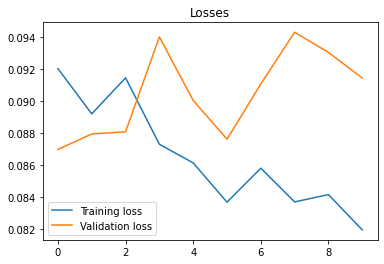

In [ ]:
plt.plot(train_losses, label="Training loss")
plt.plot(val_losses, label="Validation loss")
plt.legend()
plt.title("Losses")

In [ ]:
model.eval() # disable dropout for deterministic output
with torch.no_grad(): # deactivate autograd engine to reduce memory usage and speed up computations
    y_preds = []
    batch = 0
    for x_batch, y_batch, batch in generate_batch_data(x_test, y_test, batch_size):
        y_pred = model(x_batch)
        y_preds.extend(y_pred.cpu().numpy().tolist())
    y_preds_np = np.array(y_preds)

In [ ]:
y_preds_np

array([[2.17942201e-04, 2.35123791e-12, 1.57843726e-06, 6.41837996e-14,
        2.62668368e-06, 9.20249335e-08],
       [5.42864995e-03, 6.15100646e-08, 1.80015297e-04, 8.75959361e-10,
        3.12687363e-04, 7.26215603e-06],
       [4.45767277e-04, 1.96976411e-11, 5.17533999e-06, 7.45361021e-13,
        7.51772313e-06, 2.35709848e-07],
       ...,
       [1.51395367e-03, 5.13346532e-10, 3.58205580e-05, 4.99009237e-11,
        4.41874654e-05, 1.78684058e-06],
       [4.03595404e-05, 1.18596361e-14, 1.41359109e-07, 3.54629349e-16,
        2.37233436e-07, 3.89933730e-09],
       [2.55502877e-04, 1.16085050e-11, 1.73522142e-06, 4.11508697e-14,
        3.67015105e-06, 4.57644873e-08]])

In [ ]:
y_test_np = df_test[target_columns].values
y_test_np[1000:]

array([[1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
auc_scores = roc_auc_score(y_test_np, y_preds_np, average=None)
df_accuracy = pd.DataFrame({"label": target_columns, "auc": auc_scores})
df_accuracy.sort_values('auc')[::-1]

,label,auc
1,severe_toxic,0.942452
4,insult,0.914993
0,toxic,0.913650
2,obscene,0.898657
5,identity_hate,0.897214
3,threat,0.853333


In [ ]:
df_test_targets = df_test[target_columns]
df_pred_targets = pd.DataFrame(y_preds_np.round(), columns=target_columns, dtype=int)
df_sanity = df_test_targets.join(df_pred_targets, how='inner', rsuffix='_pred')

In [ ]:
df_test_targets.sum()

toxic            186
severe_toxic      17
obscene           98
threat             5
insult            96
identity_hate     18
dtype: int64

In [ ]:
df_pred_targets.sum()

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64